## MIS780 Advanced AI For Business - Assignment 1 - T2 2024

**Student Name:** Jeremiyah Mathew Peter

**Student ID:** 222632529

## Table of Content

1. [Executive Summary](#cell_executivesummary)


2. [Data Exploration](#cell_exploration)


3. [Sentiment Analysis](#cell_sentiment)


4. [Topic Modeling](#cell_TopicModeling)


5. [Practical Implication](#cell_PracticalImplication)


<a id = "cell_executivesummary"></a>
### 1. Executive Summary


**Business Problem**:

Our aim is to explore the data given for the three branches of theme park, gain insights and provide answers to the questions of interest by the client.
The questions in concise manner includes
1. identifying the top 10 groups of visitors coming to each park and discuss the differences and provide reasons for the differences.
2. Find out the peak visiting times in the california branch for both domestic and international visitors, find out differences and provide reasons.
3. Compare the overall sentiments expressed about the theme parks and which branch recieved the most positive sentiment scores.
4. Which branch recieved the most positive score for their services.
5.  What were the concerns and interests of the customers when they vsisited the theme parks.
6. Finding out the differences in concerns and interests of visitors from United States and United Kingdom and find the reasons.



**Approaches to solve the questions**

For Questions A and B, we propose data exploration by analysing characteristics of the data attributes and using visualisations when necessary.

For Questions C and D, we propose using sentimental analysis using text analysis. The data is unlabelled, therefore, we used lexicon based sentiment analysis to find out the positive and negative scores for each theme park and find out which theme park received the highest positive score.

For Questions E and F, we propose using Topic modelling to find out the most expressed concerns and interests of the visitors, But before that we find the best number of topics using coherence score.


**Major Findings**

1. The top ten groups analysis shows that United States, Australia, United Kingdom are the frequent visitors in each theme park as they tour around the while once in a while. Also United states, Paris are tourist destinations for many as well. Countries from Europe visits Paris branch, People from Asia visits Hongkong, People around North America and South America goes to California Branch.

2. June and July are summer holidays for US citizens, so that is the peak time for domestic visitors. September and October is autumn time in US, therefore, internationals go there at at that time. The least peak period for both domestic and internationals are january and february as it is winter time.

3. Hongkong has the highest overall sentiment score claiming the highest customer satisfaction. California has the highest positive score which shows customers are more happier in that branch. Paris has the highest positive customer reviews for their services offered.

4. The concerns of the visitors are queueing, currency Euros, parking, entrance check, rude members/customers/staff, breakfast, meals, shops, drinks and weather.
Major attractions like orlando, princess, indiana jones, walt, caribbean thunder, haunted mansions are major interests to the visitors. Holiday seasons,Halloween and weekends, birthdays are the best times to visit. Studios, hopper tickets and taking photos are one of the best interests as well

The major attractions are the major topics in the reviews.

The Vistors from US are concerned about entrance check, hopper tickets, parking while UK vistors are concerned about queues, Currency Euros, drinks, breakfast, meals and shops.

Both Vistors from US and UK like to visit during  holday season, weekends and Halloween.



<a id = "cell_exploration"></a>
### 2. Data Exploration




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# load dataset
Park = pd.read_csv("/content/drive/MyDrive/ThemeParkReviews.csv",encoding = 'latin-1')
Park.head()

In [ ]:
Park.isnull().sum()

Finding the top 10 groups visiting each parks

In [ ]:
for park in Park['Branch'].unique():
    top_locations = Park[Park['Branch'] == park]['Reviewer_Location'].value_counts().head(10)
    print(f"Top 10 Reviewer Locations for {park}:")
    for location, count in top_locations.items():
        print(f"{location}: {count}")
    print("----")

Top 10 Reviewer Locations for California:
United States: 10152
Australia: 2010
Canada: 1511
United Kingdom: 852
New Zealand: 423
India: 111
Mexico: 86
Singapore: 78
Philippines: 45
Brazil: 44
----
Top 10 Reviewer Locations for HongKong:
Australia: 1358
India: 887
Philippines: 811
United States: 723
Singapore: 687
United Kingdom: 606
Hong Kong: 429
Malaysia: 429
Indonesia: 374
United Arab Emirates: 173
----
Top 10 Reviewer Locations for Paris:
United Kingdom: 6574
United States: 1078
Australia: 496
Ireland: 344
India: 246
Canada: 154
Netherlands: 150
France: 148
Belgium: 112
Germany: 105
----


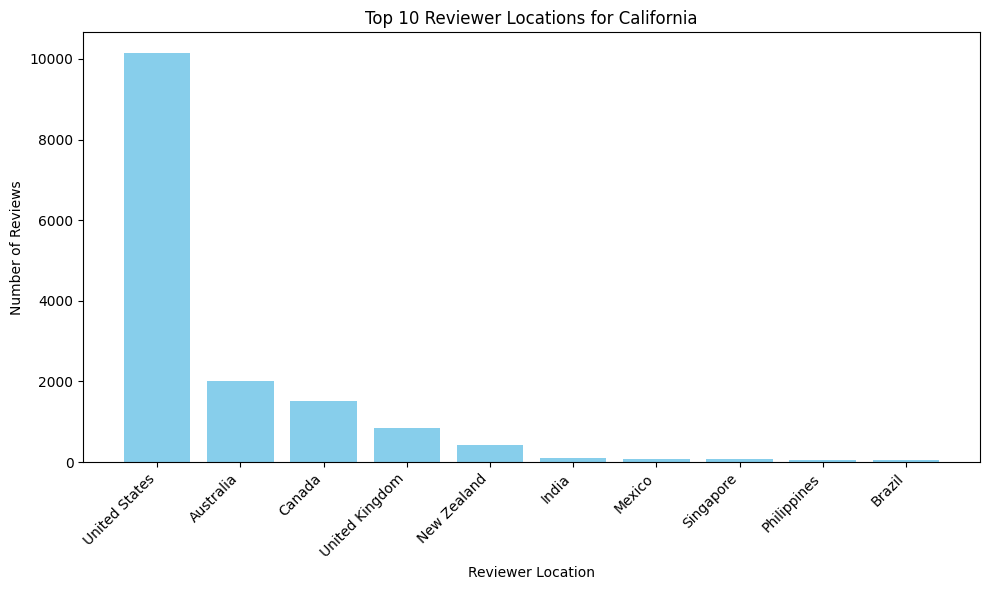

----


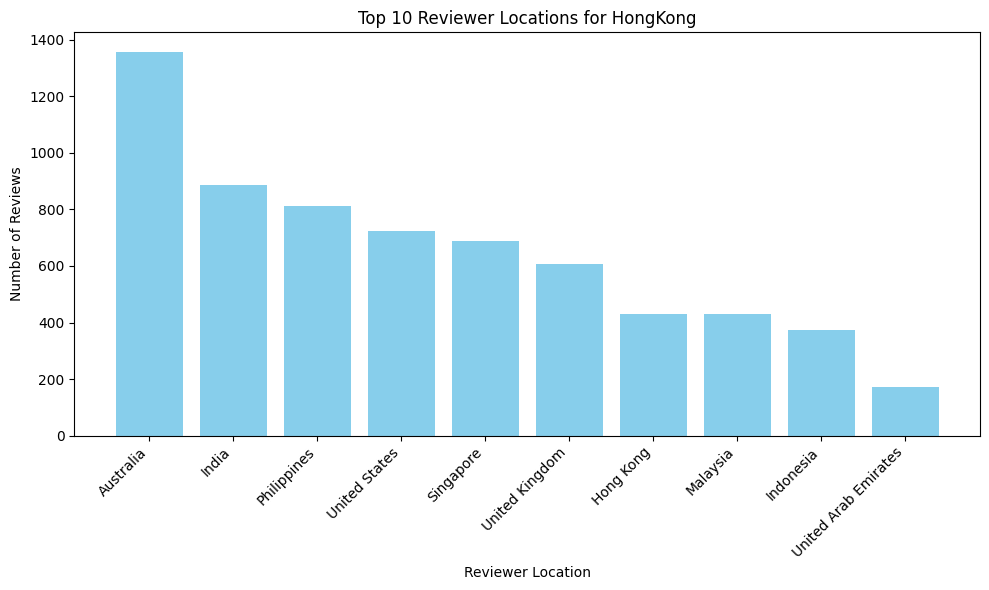

----


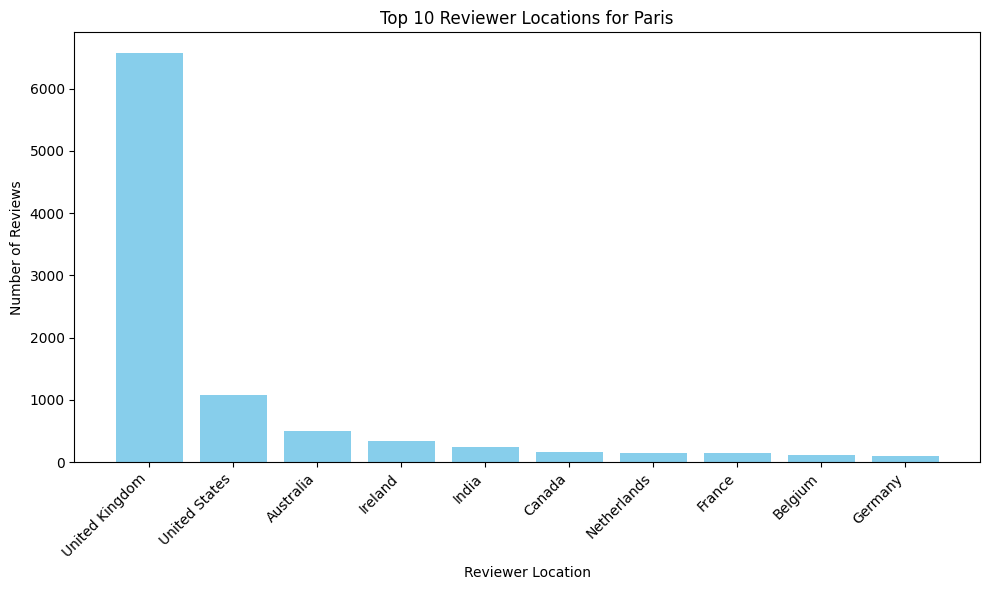

----


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

for park in Park['Branch'].unique():
    top_locations = Park[Park['Branch'] == park]['Reviewer_Location'].value_counts().head(10)

    plt.figure(figsize=(10, 6))
    plt.bar(top_locations.index, top_locations.values, color='skyblue')
    plt.title(f'Top 10 Reviewer Locations for {park}')
    plt.xlabel('Reviewer Location')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print("----")

**QN:1

The top ten groups visiting california branch are United States, Australia, Canada, United Kingdom, Newzealand, India, Mexico, Singapore, Philippines, Brazil.

The top ten groups visiting Hongkong branch are Australia, India, Philippines, United states, Singapore, United Kingdom, Hongkong, Malaysia, Indonesia, United Arab Emirates.

The top ten groups visiting Paris branch are United Kingdom, United States, Australia, Ireland, India, Canada, Netherlands, France, Belgium, Germany.

 People from countries like United states, United kingdom, Newzealand, Australia who have the culture of touring around the popular destinations once in a while has gone to all these branches as part of their culture.

However, countries like canada, brazil , mexico has high number of visit to california branch as they are closer to United states as well as newzealand,Singapore, India has reached california as United States is one of the most popular tourist destinations.

Asian countries like India, singapore, philipines, UAE, Malaysia, Indonesia, Hongkong has higher visits in Hongkong as they are closer to the destination.

European countries like Netherlands, Germany, belgium, France, Ireland has higher number of visits to Paris branch as they are in closer proximity to Paris branch. It is a famous tourist destination as well.



Finding the peak seasons for california branch and sorting out with domestic and internationals

Finding missing values

In [ ]:
Park['Year_Month'].describe()

count       35000
unique        111
top       missing
freq         2187
Name: Year_Month, dtype: object

In [ ]:
missing_dates = Park[Park['Year_Month'] == 'missing']
print(missing_dates)

In [ ]:
Park_cleaned = Park[Park['Year_Month'] != 'missing']

In [ ]:
print(Park_cleaned['Year_Month'].unique())

In [ ]:
print(len(Park_cleaned['Year_Month']))

32813


<ipython-input-14-67361fc2ef81>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_data['Year_Month'] = pd.to_datetime(california_data['Year_Month'], format='%Y-%m', errors='coerce')
<ipython-input-14-67361fc2ef81>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_data['Year'] = california_data['Year_Month'].dt.year
<ipython-input-14-67361fc2ef81>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

<Figure size 1000x600 with 0 Axes>

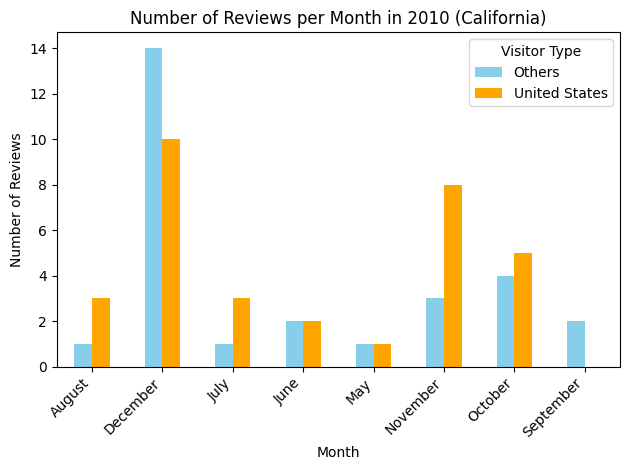

<Figure size 1000x600 with 0 Axes>

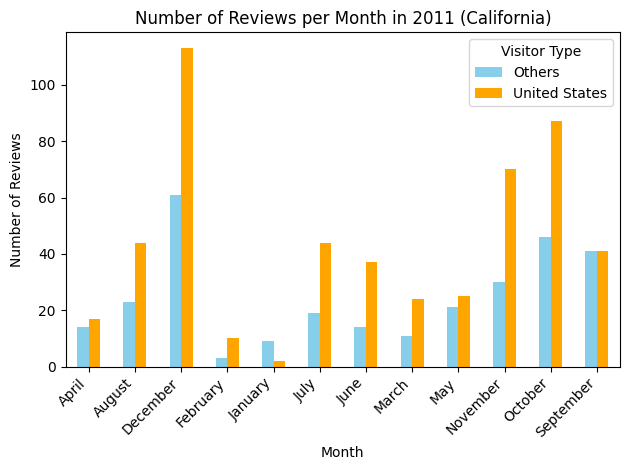

<Figure size 1000x600 with 0 Axes>

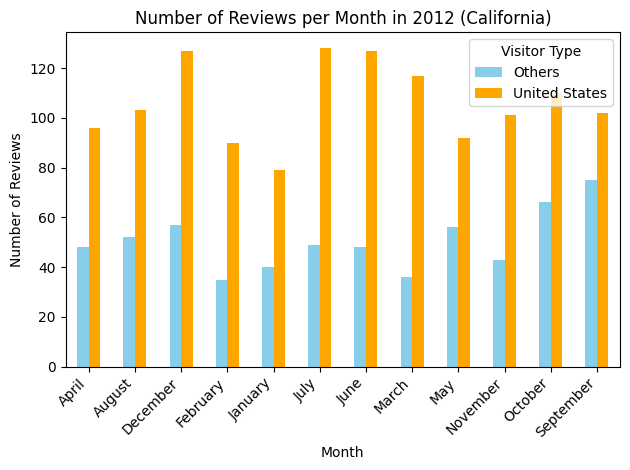

<Figure size 1000x600 with 0 Axes>

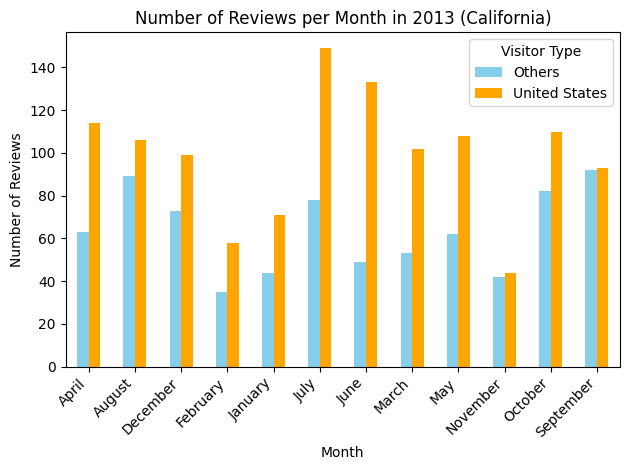

<Figure size 1000x600 with 0 Axes>

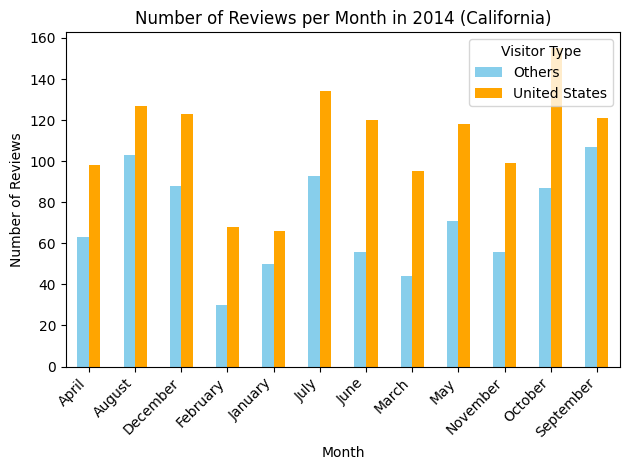

<Figure size 1000x600 with 0 Axes>

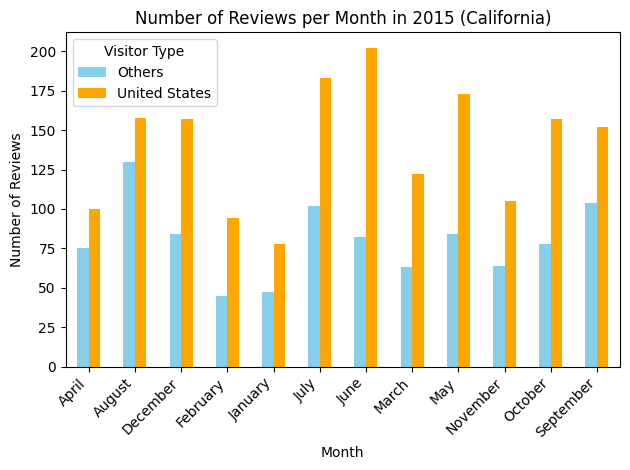

<Figure size 1000x600 with 0 Axes>

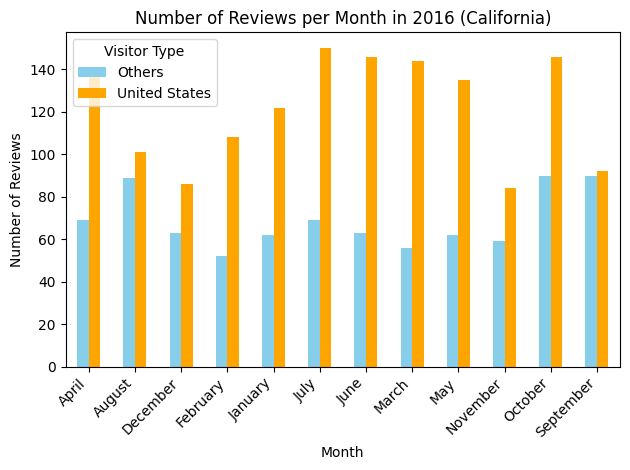

<Figure size 1000x600 with 0 Axes>

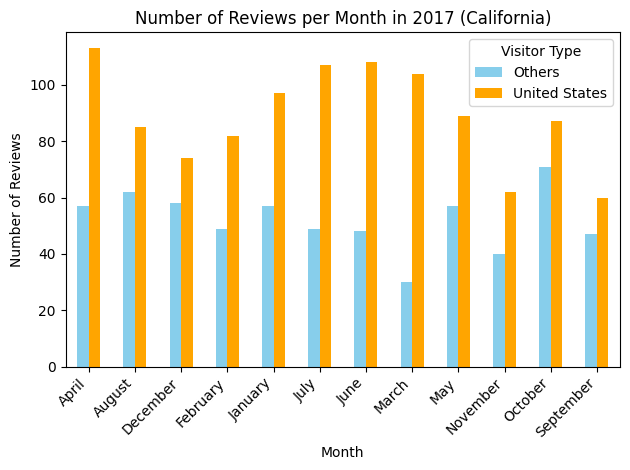

<Figure size 1000x600 with 0 Axes>

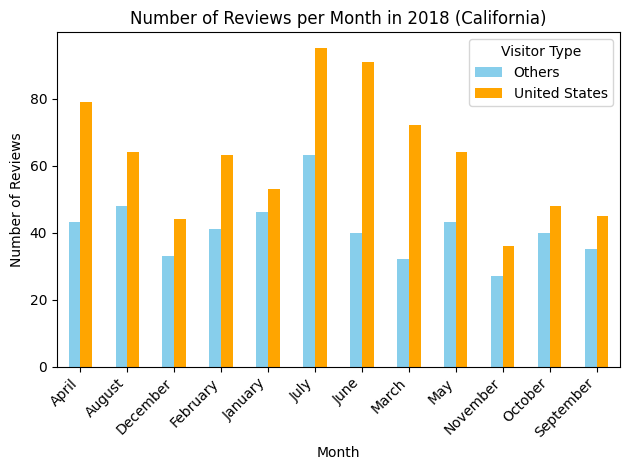

<Figure size 1000x600 with 0 Axes>

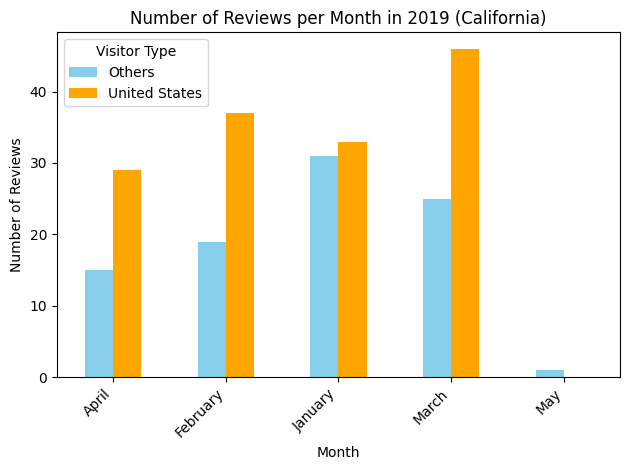

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for California branch
california_data = Park_cleaned[Park_cleaned['Branch'] == 'California']

# Convert 'Year_Month' to datetime, handling errors
california_data['Year_Month'] = pd.to_datetime(california_data['Year_Month'], format='%Y-%m', errors='coerce')

# Extract year and month
california_data['Year'] = california_data['Year_Month'].dt.year
california_data['Month'] = california_data['Year_Month'].dt.month_name()

# Categorize visitors
california_data['Visitor_Type'] = california_data['Reviewer_Location'].apply(lambda x: 'United States' if x == 'United States' else 'Others')

# Group by year, month, and visitor type, count reviews
monthly_counts = california_data.groupby(['Year', 'Month', 'Visitor_Type'])['Review_ID'].count().unstack(fill_value=0)

# Plot for each year
for year in monthly_counts.index.get_level_values(0).unique():
    plt.figure(figsize=(10, 6))
    monthly_counts.loc[year].plot(kind='bar', color=['skyblue', 'orange'])
    plt.title(f'Number of Reviews per Month in {year} (California)')
    plt.xlabel('Month')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Visitor Type')
    plt.tight_layout()
    plt.show()

<ipython-input-15-f97f080a1c30>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_data['Year_Month'] = pd.to_datetime(california_data['Year_Month'], format='%Y-%m', errors='coerce')
<ipython-input-15-f97f080a1c30>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_data['Year'] = california_data['Year_Month'].dt.year
<ipython-input-15-f97f080a1c30>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

<Figure size 1000x600 with 0 Axes>

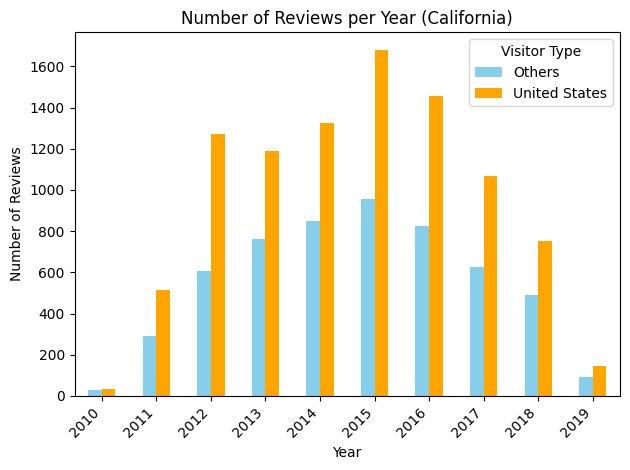

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for California branch
california_data = Park_cleaned[Park_cleaned['Branch'] == 'California']

# Convert 'Year_Month' to datetime, handling errors
california_data['Year_Month'] = pd.to_datetime(california_data['Year_Month'], format='%Y-%m', errors='coerce')

# Extract year
california_data['Year'] = california_data['Year_Month'].dt.year

# Categorize visitors
california_data['Visitor_Type'] = california_data['Reviewer_Location'].apply(lambda x: 'United States' if x == 'United States' else 'Others')

# Group by year and visitor type, count reviews
yearly_counts = california_data.groupby(['Year', 'Visitor_Type'])['Review_ID'].count().unstack(fill_value=0)

# Plot yearly counts
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Number of Reviews per Year (California)')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Visitor Type')
plt.tight_layout()
plt.show()

QN: 2

The most domestic visits happen during the months of July and June because of summer holidays. The least visit happens during january and february.

The most international visits happen during August, September, October. The least visits happen during January, February, March.

Internationals visit california branch in August, sepetember, october because Its Autumn in US during that time and its nice season to visit. January, February, March is the time of winter, therefore, California branch gets lesser visits from both domestic and internationals during that time.


<a id = "cell_sentiment"></a>
### 3. Sentiment Analysis



Loading data again

In [ ]:
import pandas as pd
# load dataset
Park = pd.read_csv("/content/drive/MyDrive/ThemeParkReviews.csv",encoding = 'latin-1')
Park.head()


In [ ]:
print(len(Park['Year_Month']))

35000


Text processing

In [ ]:
#load the NLTK toolbox before we start
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

Tokenization

In [ ]:
raw = {'Review_Text':Park['Review_Text']}
print(raw['Review_Text'])

In [ ]:
from nltk.tokenize import word_tokenize

# Access the 'Review_Text' value from the dictionary
text_series = raw['Review_Text']

# Tokenize the text string
for text in text_series:
    tokens = word_tokenize(text)
    print(tokens)

Stemming

In [ ]:
from nltk import PorterStemmer

porter = PorterStemmer()
[porter.stem(t) for t in tokens]

Sentence Segmentation

In [ ]:
from nltk.tokenize import sent_tokenize

# Access the 'Review_Text' value from the dictionary
text_series = raw['Review_Text']

# Tokenize the text string into sentences
for text in text_series:
    sents = sent_tokenize(text)  # Pass the text string to sent_tokenize
    print(sents)

Stopwords Removal

In [ ]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

In [ ]:
filtered_sent=[]
for w in tokens:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokens)
print("Filterd Sentence:",filtered_sent)

Tagging Words

In [ ]:
text = nltk.word_tokenize(Park['Review_Text'][0])
nltk.pos_tag(text)

Bag of words features

In [ ]:
#Code cell
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

text_counts = cv.fit_transform(Park['Review_Text'])
print('Bag of Word Matrix size: ', text_counts.shape)
print('Data in the first row:\n', text_counts[1,:])

Lexicon-based Sentiment Analysis

In [ ]:
# first, we import the relevant modules from the NLTK library
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
#Initialize an instance of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

message_text = Park['Review_Text']
print('Review Comment:\n', message_text)

In [ ]:
#Initialize an instance of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Iterate over each review comment in the Series
for comment in Park['Review_Text']:
    #Estimate sentiment scores
    scores = sid.polarity_scores(comment)
    print('Review Comment:\n', comment)  # Print the comment
    for key in sorted(scores):
        print('{0}: {1} \n'.format(key, scores[key]), end='')
    print('---')  # Add a separator between reviews

In [ ]:
#Initialize an instance of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Initialize variables to store aggregate scores
compound_total = 0
count = 0

# Iterate over each review comment in the Series
for comment in Park['Review_Text']:
    #Estimate sentiment scores
    scores = sid.polarity_scores(comment)
    compound_total += scores['compound']  # Add the compound score to the total
    count += 1  # Increment the count of reviews

# Calculate the average compound score
average_compound = compound_total / count if count > 0 else 0  # Handle potential division by zero

print("Average Compound Sentiment Score:", average_compound)

Average Compound Sentiment Score: 0.6817212942857086


In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Assuming you have a DataFrame 'Park' with columns 'Branch' and 'Review_Text'
# Initialize an empty list to store the results
results = []

# Group reviews by branch (or theme park)
grouped_reviews = Park.groupby('Branch')

# Iterate over each branch group
for branch_name, reviews in grouped_reviews:
    compound_total = 0
    count = 0

    # Iterate over each review in the group
    for comment in reviews['Review_Text']:
        # Estimate sentiment scores
        scores = sid.polarity_scores(comment)
        compound_total += scores['compound']  # Add the compound score to the total
        count += 1  # Increment the count of reviews

    # Calculate the average compound score for the branch
    average_compound = compound_total / count if count > 0 else 0

    # Append the result to the list
    results.append({'Branch': branch_name, 'Average_Compound_Score': average_compound})

# Convert the results list to a DataFrame
theme_park_scores = pd.DataFrame(results)

# Print the results
print(theme_park_scores)

       Branch  Average_Compound_Score
0  California                0.695758
1    HongKong                0.707566
2       Paris                0.643390


In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Assuming you have a DataFrame 'Park' with columns 'Branch' and 'Review_Text'
# Initialize an empty list to store the results
results = []

# Group reviews by branch (or theme park)
grouped_reviews = Park.groupby('Branch')

# Iterate over each branch group
for branch_name, reviews in grouped_reviews:
    positive_total = 0
    count = 0

    # Iterate over each review in the group
    for comment in reviews['Review_Text']:
        # Estimate sentiment scores
        scores = sid.polarity_scores(comment)
        positive_total += scores['pos']  # Add the positive score to the total
        count += 1  # Increment the count of reviews

    # Calculate the average positive score for the branch
    average_positive = positive_total / count if count > 0 else 0

    # Append the result to the list
    results.append({'Branch': branch_name, 'Average_Positive_Score': average_positive})

# Convert the results list to a DataFrame
theme_park_positive_scores = pd.DataFrame(results)

# Print the results
print(theme_park_positive_scores)

       Branch  Average_Positive_Score
0  California                0.186657
1    HongKong                0.180233
2       Paris                0.160881


QN: 3

The overall sentiment score is higher in Hongkong with 0.70, second its California with 0.69 and then Paris with 0.64. It means Hongkong branch has the highest satisfaction from the visitors.

The most positive score is for california Branch with 0.186 sentiment score. The customer has nicer experience in California branch.

Finding out the highest positive sentiment score for their services goes to which park

Aspect-level sentiment Analysis

In [ ]:
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Check the overall sentiment for each message
sid = SentimentIntensityAnalyzer()
for text in message_text: # Iterate over each string in the Series
    OverallSen = sid.polarity_scores(text)
    print('OVERALL SENTIMENT SCORE: \n', OverallSen)

In [ ]:
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

#Compute Sentiment Score by text trunk
sid = SentimentIntensityAnalyzer() # Initialize SentimentIntensityAnalyzer

scores = []
for review in message_text:  # Iterate over each review string in the Series
    # Replace commas with periods within each review
    review = review.replace(',','.')

    # Tokenize sentences within the current review
    sents = sent_tokenize(review)

    for s in sents:
       scores.append(sid.polarity_scores(s))

# Show sentiment score of individual trunks
[s for s in scores]

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import plotly.express as px # Import the plotly.express module

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def get_positive_services_sentiment(text):
    words = nltk.word_tokenize(text)
    positive_service_sentiments = []
    for i, word in enumerate(words):
        if word.lower() == 'services':
            context = " ".join(words[max(0, i - 2):min(i + 3, len(words))])
            sentiment_score = sia.polarity_scores(context)['compound']
            if sentiment_score > 0:  # Consider only positive sentiments
                positive_service_sentiments.append(sentiment_score)
    if positive_service_sentiments:
        return sum(positive_service_sentiments) / len(positive_service_sentiments)
    else:
        return None

Park['Positive_Services_Sentiment'] = Park['Review_Text'].apply(get_positive_services_sentiment)

# Calculate the average positive sentiment score for "services" for each theme park
average_positive_sentiments = Park.groupby('Branch')['Positive_Services_Sentiment'].mean()

# Convert the Series to a DataFrame for plotting
average_positive_sentiments_df = average_positive_sentiments.reset_index()

print(average_positive_sentiments_df)
fig = px.bar(average_positive_sentiments_df,  # Use the DataFrame here
             x='Branch',  # 'Branch' is now a column in the DataFrame
             y='Positive_Services_Sentiment',
             title='Average Positive Sentiment Scores for "Services" by Branch',
             labels={'Branch': 'Theme Park Branch', 'Positive_Services_Sentiment': 'Average Positive Sentiment Score'})

# Customize appearance (optional)
fig.update_traces(marker_color='skyblue')
fig.update_layout(xaxis_title='Theme Park Branch', yaxis_title='Average Positive Sentiment Score')

# Display the chart
fig.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


       Branch  Positive_Services_Sentiment
0  California                     0.471988
1    HongKong                     0.435250
2       Paris                     0.488756


QN: 4

The Paris branch has the most positive score for their services (0.488). Then the california branch has the second best score 0.47 and Hongkong has positive score of 0.43.

<a id = "cell_TopicModeling"></a>
### 4. Topic Modeling




In [ ]:
import pandas as pd
# load dataset
Park = pd.read_csv("/content/drive/MyDrive/ThemeParkReviews.csv",encoding = 'latin-1')
Park.head()

In [ ]:
import matplotlib
from matplotlib import pyplot

Index(['California', 'Paris', 'HongKong'], dtype='object', name='Branch')


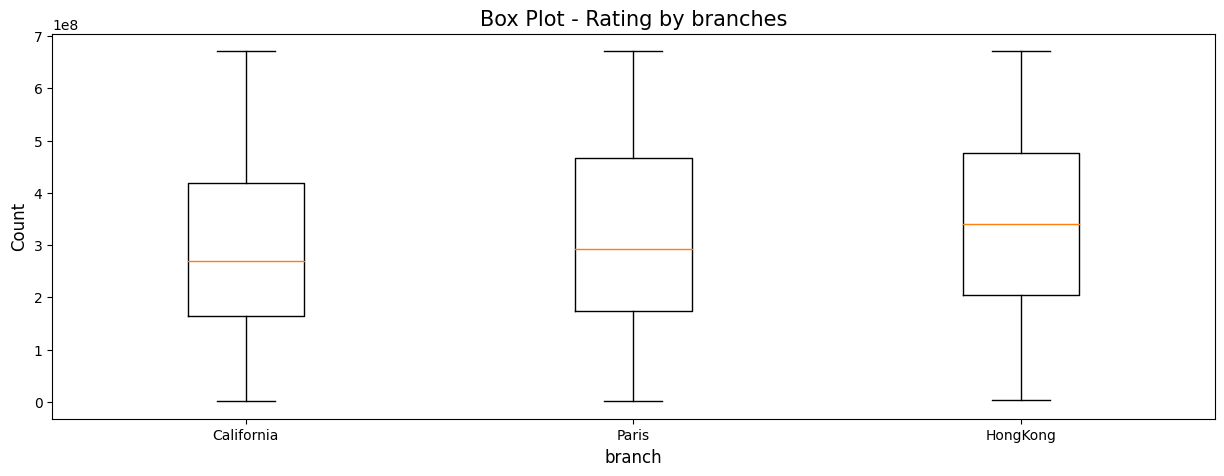

In [ ]:
Branch_boxplot = Park.groupby(['Branch']).count()
Branch_boxplot.sort_values('Reviewer_Location', inplace=True, ascending=False)
Topbranches = Branch_boxplot.index[0:10]
print(Topbranches)

RatingData = []
for i in range(len(Topbranches)):
  RatingData.append(Park.loc[Park['Branch'] == Topbranches[i]]['Review_ID'].dropna())

pyplot.figure(figsize=(15,5))
pyplot.title('Box Plot - Rating by branches', fontsize=15)
pyplot.xlabel('branch', fontsize=12)
pyplot.ylabel('Count', fontsize=12)
pyplot.boxplot(RatingData, labels = Topbranches);

In [ ]:
from nltk.stem import PorterStemmer #Stemming Package
import re  #Regular expression operation package

porter = PorterStemmer()

documents = Park['Review_Text']
Cleaned_doc = []
for r in range(len(documents)):
    review = documents[r]
    try:
        # removing everything except alphabets
        review = re.sub('[^A-Za-z]', ' ', review)
        # make all text lowercase
        review = review.lower()
        # apply tokenization
        Tokens = review.split()
        # apply stemming operation (Optional)
        #for t in range(len(Tokens)):
        #    Tokens[t] = porter.stem(Tokens[t])
        # removing short words
        Filtered_token = [w for w in Tokens if len(w)>3]
        review = ' '.join(Filtered_token)
    except:
        continue
    #Save cleaned text
    Cleaned_doc.append(review)
    print('-[Review Text]: ', review)

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = stopwords.words('english')

# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item)
    print('-[Cleaned Text]: ', Cleaned_doc[r])

###  Term Document Matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()# Fit and transform the processed titles

count_data = count_vectorizer.fit_transform(Cleaned_doc)
count_data
import numpy as np

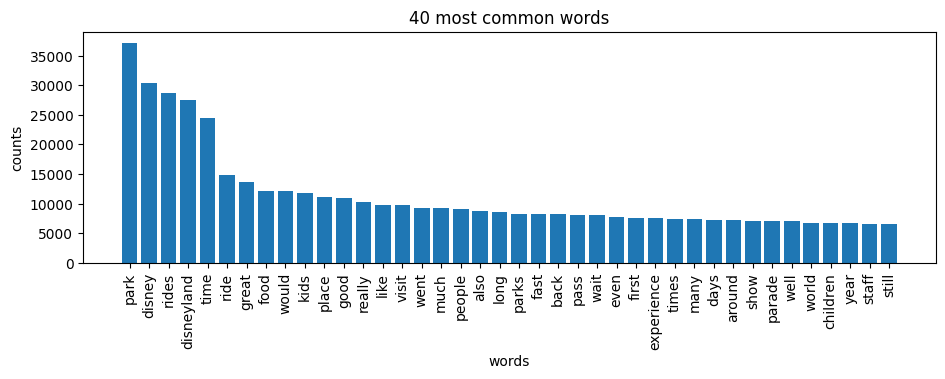

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
#Get the term list
terms = count_vectorizer.get_feature_names_out()

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:40] #Take the top 40 words

words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))

plt.figure(2, figsize=(11, 3))
plt.subplot(title='40 most common words')
plt.bar(words, counts)
plt.xticks(x_pos, words, rotation=90)
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

In [ ]:
#Remove highly frequent (Greater than 20%) and infrequent words (less than 1%)
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 2000 and total_counts[t] > 100:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex]
ReducedCount

Number of Terms Remained:  1909


<35000x1909 sparse matrix of type '<class 'numpy.int64'>'
	with 718955 stored elements in Compressed Sparse Row format>

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def extract_nouns(text):
  tokens = nltk.word_tokenize(text)
  tagged = nltk.pos_tag(tokens)
  return [word for word, tag in tagged if tag.startswith('N')]

all_nouns = []
for term in ReducedTerm:
  nouns = extract_nouns(term)
  all_nouns.extend(nouns)

print(all_nouns)

 Selecting Topic Number

In [ ]:
#This only needs to run once to install Gensim package
#Make sure that your computer is connected to the Internet
!pip install Cython
!pip install gensim

###  Data Preparation

In [ ]:
Cleaned_doc_new = []
print('CLEANED TEXT NEW: ')
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        #Keep only terms included in ReducedTerm
        if t in all_nouns:
             each_item.append(t)
    Cleaned_doc_new.append(each_item)
    print(Cleaned_doc_new[r])

In [ ]:
import gensim.corpora as corpora

# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(Cleaned_doc_new)
print(id2word.token2id)

###  Gensim LDA Model

In [ ]:
#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_new]
print(Corpus)

In [ ]:
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint#

#Train model using bag of word reprentation
lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=100)

#Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[Corpus]

[(0,
  '0.043*"birthday" + 0.028*"tour" + 0.018*"perfect" + 0.017*"walt" + '
  '0.015*"nothing" + 0.013*"cover" + 0.013*"part" + 0.012*"husband" + '
  '0.012*"anniversary" + 0.011*"lion"'),
 (1,
  '0.036*"thunder" + 0.023*"buzz" + 0.020*"jones" + 0.019*"indiana" + '
  '0.018*"caribbean" + 0.017*"coaster" + 0.017*"peter" + 0.015*"lightyear" + '
  '0.012*"roller" + 0.011*"walt"'),
 (2,
  '0.044*"princess" + 0.030*"weather" + 0.026*"princesses" + 0.020*"cold" + '
  '0.017*"rain" + 0.015*"miss" + 0.014*"firework" + 0.014*"girls" + '
  '0.013*"ages" + 0.012*"light"'),
 (3,
  '0.040*"studios" + 0.030*"euros" + 0.012*"studio" + 0.009*"cost" + '
  '0.009*"prices" + 0.008*"help" + 0.008*"told" + 0.008*"check" + '
  '0.008*"maintenance" + 0.008*"attention"'),
 (4,
  '0.039*"village" + 0.019*"photo" + 0.018*"photos" + 0.016*"character" + '
  '0.012*"shops" + 0.010*"book" + 0.009*"station" + 0.009*"plenty" + '
  '0.009*"cafe" + 0.008*"minnie"'),
 (5,
  '0.020*"euro" + 0.017*"meal" + 0.015*"breakfa

In [ ]:
from gensim.models import CoherenceModel

# Compute Coherence Score. Note: that CoherenceModel require
# text input format (Cleaned_doc_new) instead of bag of word
coherence_model_lda = CoherenceModel(model=lda_model,
                                     texts=Cleaned_doc_new,
                                     dictionary=id2word,
                                     coherence='c_v')


coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6190364257332507


###  Experiment with Topic Numbers

In [ ]:
#Evaluation models with topics numbers from 2 to 10
Topics = list(range(2,11,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=100)
    #Keep the trained models
    Trained_Models.append(lda_model)
    #Compute coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=Cleaned_doc_new,
                                         dictionary=id2word,
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores
    coherence_scores.append(coherence)
    print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Topic Number: 2 -- Coherence: 0.7396168344541911
Topic Number: 3 -- Coherence: 0.7399510463397895
Topic Number: 4 -- Coherence: 0.7337765124601169
Topic Number: 5 -- Coherence: 0.7056545627696542
Topic Number: 6 -- Coherence: 0.6979980240453035
Topic Number: 7 -- Coherence: 0.6834314625993044
Topic Number: 8 -- Coherence: 0.6776459886424215
Topic Number: 9 -- Coherence: 0.6437571152570543
Topic Number: 10 -- Coherence: 0.6190364257332507


Text(0, 0.5, 'Coherence')

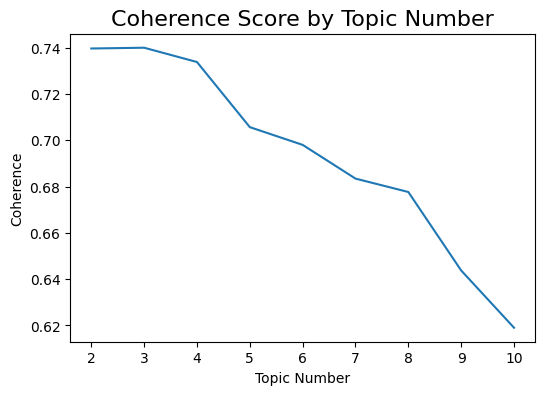

In [ ]:
pyplot.figure(figsize=(6,4))
pyplot.plot(coherence_scores)
pyplot.xticks(range(0,len(Topics)),Topics)
pyplot.title('Coherence Score by Topic Number', fontsize=16)
pyplot.xlabel('Topic Number')
pyplot.ylabel('Coherence')

###  The Best Model

In [ ]:
import numpy
lda_model = Trained_Models[numpy.argmax(coherence_scores)]

#Show top 10 words in each topic
lda_model.show_topics(num_words=10)

[(0,
  '0.009*"euros" + 0.009*"euro" + 0.009*"smoking" + 0.008*"told" + 0.007*"rude" + 0.007*"shops" + 0.007*"helpful" + 0.007*"cost" + 0.007*"holiday" + 0.006*"entrance"'),
 (1,
  '0.018*"thunder" + 0.013*"coaster" + 0.013*"studios" + 0.012*"orlando" + 0.012*"buzz" + 0.010*"walt" + 0.010*"jones" + 0.009*"roller" + 0.009*"indiana" + 0.009*"caribbean"'),
 (2,
  '0.010*"breakfast" + 0.010*"princess" + 0.009*"village" + 0.009*"weather" + 0.009*"meal" + 0.008*"book" + 0.008*"restaurant" + 0.008*"ages" + 0.008*"plenty" + 0.008*"character"')]

LDA Modelling

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Tweak the two parameters below
number_topics = 5

lda = LDA(n_components=number_topics, n_jobs=-1, random_state=2023)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_

###  Word Probabilities by Topic

In [ ]:
#Word Probablities in Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
print(Word_Topics_Pro)

In [ ]:
for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))


Topic #0:
euros : 0.007
breakfast : 0.006
queuing : 0.006
meal : 0.006
studios : 0.006
drink : 0.005
princess : 0.005
shops : 0.005
drinks : 0.005
book : 0.005

Topic #1:
morning : 0.007
hopper : 0.006
parking : 0.005
check : 0.005
single : 0.005
entrance : 0.005
popular : 0.005
free : 0.004
photo : 0.004
cars : 0.004

Topic #2:
jones : 0.008
indiana : 0.008
walt : 0.007
orlando : 0.006
original : 0.006
haunted : 0.006
caribbean : 0.006
attraction : 0.006
thunder : 0.005
favorite : 0.005

Topic #3:
members : 0.009
told : 0.009
rude : 0.006
smoking : 0.005
birthday : 0.005
member : 0.005
nothing : 0.004
asked : 0.004
customer : 0.004
special : 0.004

Topic #4:
weather : 0.010
holiday : 0.009
halloween : 0.009
season : 0.007
easy : 0.007
plenty : 0.007
weekend : 0.007
expected : 0.007
pretty : 0.007
awesome : 0.007


In [ ]:
# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = ReducedTerm
df_topic_keywords

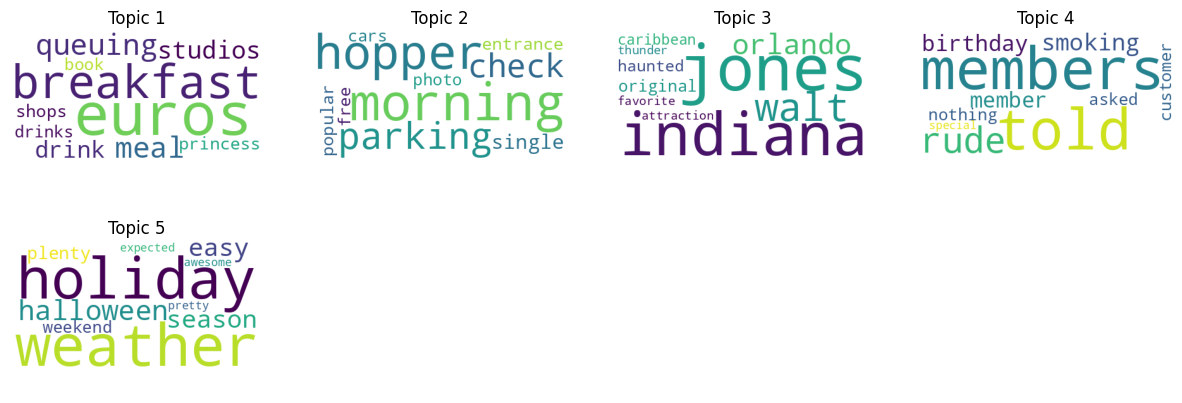

In [ ]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

rows = math.ceil(len(Word_Topics_Pro)/4)
# Create a 2D grid of subplots
fig, ax = plt.subplots(rows, 4, figsize=(15,2.5*rows))

# Flatten the 2D array of axes for easy iteration
ax = ax.flatten()

[axi.set_axis_off() for axi in ax.ravel()]
for topic_idx, topic in enumerate(Word_Topics_Pro):
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
    # convert to dictionary type - keep top 10 words
    Word_Frequency = dict(count_dict[0:10])
    # generate word cloud
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
    # visualize word cloud in figure
    subfig_Row = math.floor(topic_idx/4)
    subfig_Col = math.ceil(topic_idx%4)
    # Index the flattened array of axes
    ax[topic_idx].imshow(wordcloud)
    ax[topic_idx].set_title("Topic {}".format(topic_idx+1))
plt.show()

In [ ]:
#Compute topic distribution for each document
TopicDis_Doc = lda.transform(ReducedCount)

#Compute overall topic distribution for all each documents
Overall_Topic_Dis = sum(TopicDis_Doc)/sum(sum(TopicDis_Doc))
Overall_Topic_Dis

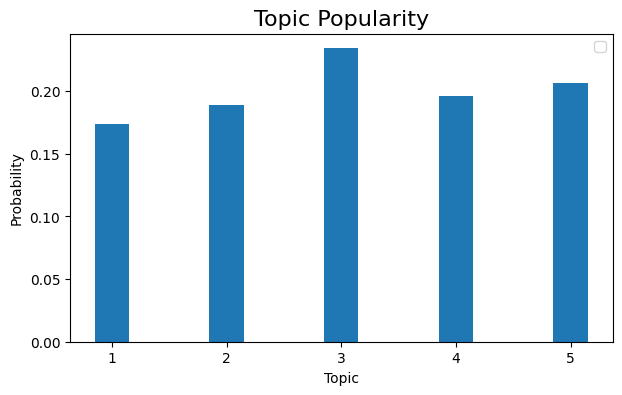

In [ ]:
# Get the topic index
Bar_index = np.asarray(range(1,number_topics+1))

#Visualize topic distributions of review groups
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Popularity', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')
pyplot.bar(Bar_index, Overall_Topic_Dis.tolist(), 0.3)
pyplot.xticks(Bar_index, Bar_index)
pyplot.legend()
pyplot.show();

###  Topic Probabilities by Document

In [ ]:
# View full Topic Probabilities by Document Matrix
TopicDis_Doc = lda.transform(ReducedCount)
df_document_topics = pd.DataFrame(TopicDis_Doc)
df_document_topics

Topic Probablity distribution by Document: 
 [[0.01128166 0.12183029 0.01134972 0.48094507 0.37459326]
 [0.05145638 0.05152624 0.05172078 0.79296171 0.05233489]
 [0.01445986 0.94144373 0.01467564 0.01457447 0.01484631]
 [0.09210102 0.11615382 0.74903249 0.00356349 0.03914918]
 [0.00974468 0.51189792 0.00976235 0.45881258 0.00978246]]


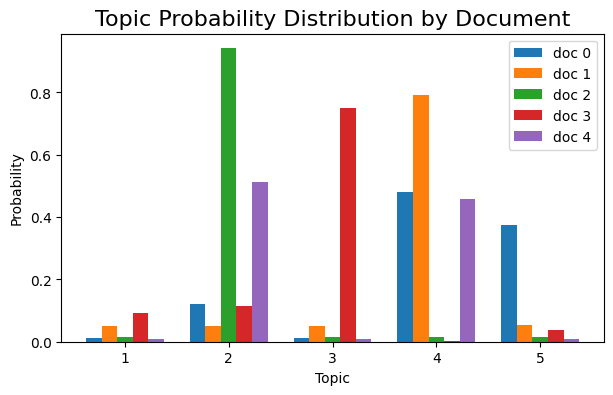

In [ ]:
# Compute the topic distribution for some reviews:
TopicDis_Doc = TopicDis_Doc[0:5]
print('Topic Probablity distribution by Document: \n', TopicDis_Doc)
# Get the topic index
Bar_index = np.asarray(range(1,number_topics+1))

#Create a new figure
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Probability Distribution by Document', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')

width = 0.15
for i in range(0,5):
    pyplot.bar(Bar_index + i*width, TopicDis_Doc[i].tolist(), width,  label='doc ' + str(i))

pyplot.xticks(Bar_index + 2*width, Bar_index)
pyplot.legend()
pyplot.show();
#NOTE: Different Run may result in Different Graph
#due to the Randomization when training the LDA model

QN: 5

**The concerns:**

Queueing is too long and time consuming

They are concerned about the currency Euros.

They are concerned about the limitations of parking.

Entrance check, rude members, smoking, weather, shops, breakfast, meal, drinks are the other major concerns.

**The interests:**

Studios are important.

Hopper tickets, princess, taking photos, carribbean thunder, haunted mansion, indiana jones, orlando, walt are major attractions.

Birthday parties are connected with the theme parks.

Holiday seasons and weekends are the best time to visit.

Halloween is a special occassion.

**The major attractions are the most discussed topics in the reviews**









Identifying concerns and interests of visitors from US and UK

###  Topic Probabilities by Document Group

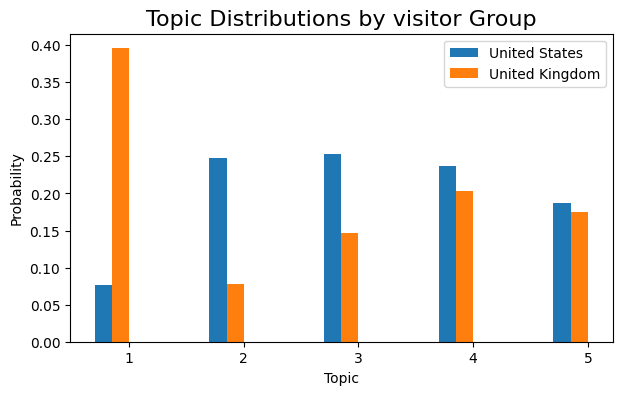

In [ ]:
import numpy as np

Selected_Countries = ['United States','United Kingdom']

Group_Prob = []
for i in range(len(Selected_Countries)):
    ReducedTerm_Selected = ReducedCount[np.where(Park['Reviewer_Location'] == Selected_Countries[i])]
    TopicDis_Doc = lda.transform(ReducedTerm_Selected)
    Group_Prob.append(sum(TopicDis_Doc)/sum(sum(TopicDis_Doc)))


#Create a new figure
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Distributions by visitor Group', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')

width = 0.15
for i in range(len(Selected_Countries)):
    pyplot.bar(Bar_index + i*width, Group_Prob[i].tolist(), width,  label=Selected_Countries[i])

pyplot.xticks(Bar_index + 1.5*width, Bar_index)
pyplot.legend()
pyplot.show();

QN: 6

The topics among the two countries US and UK are somewhat similar and different as well.

Visitors from United states are more concerned about entrance check, parking hopper tickets, taking photos while visitor from United kingdom are more concerned about Queuing, the currency Euros, shops, drinks, meal, breakfast, studios.

Both Vistors from US and UK are concerned about weather, they enjoy their holday season and weekends in the theme parks, Halloween is a major attraction to them as well.

Visitors from US are slightly more interested in the topics of major attractions like indiana jones, orlando, carribean thunder, haunted mansions, walt.

They are both concerned about rude members/customers or staff, smoking, and birhday but US visitors seems to be more concerned.

<a id = "cell_Practicalimplication"></a>
### 5. Practical Implication

1.The Parks Hongkong and Paris has less number of domestic visitors. Actions should be taken to increase popularity among their citizens.

2. The california branch should be well maintained during the time of June, july for domestic visitors and September and october for international visitors.

3. All three branches should be well maintained and offer best services to the customers even though all three of the branches seemed good in either overall sentiments, or postive sentiments or positive sentiments regarding their services offered.

4. There should be solutions like more counters in entrance check, queue, more parking spaces, currency exchanges, more shops providing food and beverages for better visitor expreriences. The staff should be polite, smoking should be prohibited and well regulated. Major attractions should be kept and ongoing. Increased selling of hopper tickets are recommended.





### References:

Shashank Kapadia. (2019, April 15). Topic Modeling in Python: Latent Dirichlet Allocation (LDA). Medium; Towards Data Science. https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

Zvornicanin, E. (2021, December 7). When Coherence Score is Good or Bad in Topic Modeling? | Baeldung on Computer Science. Www.baeldung.com. https://www.baeldung.com/cs/topic-modeling-coherence-score